In [27]:
import numpy as np
from zipfile import ZipFile

import tensorflow as tf
import tensorflow_hub as hub

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split

In [5]:
with ZipFile('C:/Users/weepo/Desktop/python_env3/dogs-vs-cats-redux-kernels-edition.zip') as zip:
    zip.extractall()                        #foward /, function

In [10]:
with ZipFile('C:/Users/weepo/Desktop/python_env3/train.zip','r') as zip:
    zip.extractall()

EDA


In [16]:
#count number of images

import os
path,dirs,files = next(os.walk('C:/Users/weepo/Desktop/python_env3/train'))
print(len(files))

25000


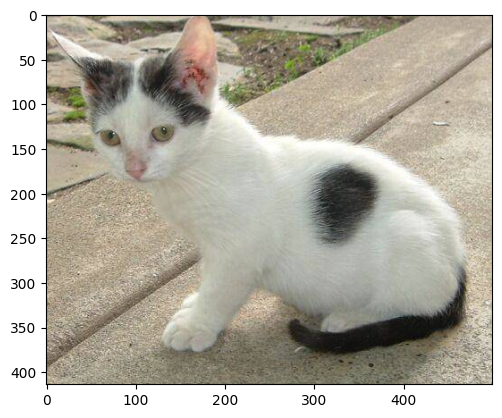

In [19]:
#img to plt

img = mpimg.imread('C:/Users/weepo/Desktop/python_env3/train/cat.3.jpg')
plt.imshow(img)
plt.show()

In [20]:
# os.mkdir('C:/Users/weepo/Desktop/python_env3/image_resized')
#end line after use

In [28]:
import random 
#to work with smaller number of images , select random images, and save to new file
#convert img to 224px 224px 3(rgb)


# original_folder = 'C:/Users/weepo/Desktop/python_env3/train/'
# new_folder = 'C:/Users/weepo/Desktop/python_env3/image_resized/'
# rander = random.sample(range(0, 25000), 2000)

# for i in rander:                                                         #random selector
#     filename = os.listdir(original_folder)[i]                           
#     imagefiledir = original_folder + filename                              #list directory + oririginal file

#     img = Image.open(imagefiledir)                                          #open file with Image
#     img = img.resize((224,224))                                                  # resize and convert
#     img = img.convert('RGB')

#     new_imagefiledir = new_folder + filename
#     img.save(new_imagefiledir)

#end line after use

In [33]:
#labels as Y
labels_catdog =[]

for i in range(2000):
    listofpics = os.listdir('C:/Users/weepo/Desktop/python_env3/image_resized')[i]
    if listofpics[0:3] == 'cat':
        labels_catdog.append(1)
    else:
        labels_catdog.append(0)


print(os.listdir('C:/Users/weepo/Desktop/python_env3/image_resized')[0:5])
print(labels_catdog[0:5])
values, counts = np.unique(labels_catdog, return_counts=True)
print(values,counts)

['cat.10034.jpg', 'cat.10036.jpg', 'cat.10038.jpg', 'cat.10042.jpg', 'cat.10048.jpg']
[1, 1, 1, 1, 1]
[0 1] [ 987 1013]


In [36]:
import cv2
import glob
#make img to (tensor)

image_directory = 'C:/Users/weepo/Desktop/python_env3/image_resized/'
image_extension =['jpg','png']


files = []                                 


[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]       #extend: You should use this method if you need to append several items to a list as individual items.
#get all directories to all images  

dog_cat_images = np.asarray([cv2.imread(file) for file in files])
#convert to array and array of images

print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images/255
Y = np.asarray(labels_catdog)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
#make model layer
mobilenet_model_link = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
mobilenet_model = hub.KerasLayer(mobilenet_model_link,input_shape =(224,224,3),trainable=False)

 

In [ ]:
#NN model transfer learning

num_of_classes = 2

model = tf.keras.Sequential([
    
    mobilenet_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train, Y_train, epochs=5)

In [ ]:
score, acc = model.evaluate(X_test, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

input_image_resize = cv2.resize(input_image, (224,224))               # resize

input_image_scaled = input_image_resize/255                 # scale

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])      #reshapw



input_prediction = model.predict(image_reshaped)

print(input_prediction)                           # give [probility A, probility B]

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')